In [1]:
!pip install opencv-python


In [2]:
!pip install pycryptodome


In [17]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import cv2
import numpy as np
import os


# Lightweight Encryption Techniques

# 1. ChaCha20

In [ ]:
import cv2
import numpy as np
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import os

# Function to encrypt an image using ChaCha20
def encrypt_image_chacha20(image_path, key):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    image_bytes = image.tobytes()

    # Generate a random nonce
    nonce = os.urandom(16)  # 128-bit nonce for ChaCha20

    # Initialize the ChaCha20 cipher
    algorithm = algorithms.ChaCha20(key, nonce)
    cipher = Cipher(algorithm, mode=None, backend=default_backend())
    encryptor = cipher.encryptor()

    # Encrypt the image data
    encrypted_data = encryptor.update(image_bytes) + encryptor.finalize()

    # Return the encrypted data, nonce, and the original shape of the image
    return nonce + encrypted_data, image.shape

# Function to decrypt an image using ChaCha20
def decrypt_image_chacha20(encrypted_data, key, shape):
    # Extract nonce and encrypted message
    nonce = encrypted_data[:16]
    encrypted_message = encrypted_data[16:]

    # Initialize the ChaCha20 cipher for decryption
    algorithm = algorithms.ChaCha20(key, nonce)
    cipher = Cipher(algorithm, mode=None, backend=default_backend())
    decryptor = cipher.decryptor()

    # Decrypt the image data
    decrypted_data = decryptor.update(encrypted_message) + decryptor.finalize()

    # Convert bytes back to image format
    decrypted_image = np.frombuffer(decrypted_data, dtype=np.uint8).reshape(shape)
    return decrypted_image

# Generate a 256-bit (32 byte) random key for ChaCha20
key = os.urandom(32)

# Encrypt and Save the Image
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
encrypted_data, shape = encrypt_image_chacha20(image_path, key)

# Save encrypted data to a file
with open('encrypted_image_chacha20.bin', 'wb') as f:
    f.write(encrypted_data)

# Read the encrypted data and Decrypt the Image
with open('encrypted_image_chacha20.bin', 'rb') as f:
    encrypted_data = f.read()

decrypted_image = decrypt_image_chacha20(encrypted_data, key, shape)

# Convert to an image and display/save
cv2.imshow('ChaCha20 Decrypted Image', decrypted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



# ChaCha20 encryption time

In [16]:
import time
import cv2
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

# Function to read image and convert to byte data
def get_image_data(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return image.tobytes()

# Function to test encryption algorithm
def test_algorithm(algorithm, data):
    start_time = time.time()
    cipher = Cipher(algorithm, mode=None, backend=default_backend())
    encryptor = cipher.encryptor()
    encrypted_data = encryptor.update(data) + encryptor.finalize()
    end_time = time.time()
    return end_time - start_time

# Load image data
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
image_data = get_image_data(image_path)

# Testing ChaCha20
chacha20_time = test_algorithm(algorithms.ChaCha20(os.urandom(32), os.urandom(16)), image_data)

# Repeat for other algorithms like AES, etc., and compare the times
# ...

print(f"ChaCha20 encryption time: {chacha20_time}")
# Print times for other algorithms


ChaCha20 encryption time: 0.003320932388305664


# ChaCha20 decryption time

In [13]:
import time
import cv2
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import os

# Function to read image and convert to byte data
def get_image_data(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return image.tobytes()

# Function to test decryption algorithm
def test_decryption_algorithm(algorithm, encrypted_data):
    start_time = time.time()
    cipher = Cipher(algorithm, mode=None, backend=default_backend())
    decryptor = cipher.decryptor()
    decrypted_data = decryptor.update(encrypted_data) + decryptor.finalize()
    end_time = time.time()
    return end_time - start_time

# Encrypt the image first
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
image_data = get_image_data(image_path)

# Example using ChaCha20 for encryption
key = os.urandom(32)  # 256-bit key for ChaCha20
nonce = os.urandom(16)  # 128-bit nonce for ChaCha20
algorithm = algorithms.ChaCha20(key, nonce)
cipher = Cipher(algorithm, mode=None, backend=default_backend())
encryptor = cipher.encryptor()
encrypted_data = encryptor.update(image_data) + encryptor.finalize()

# Testing ChaCha20 decryption
chacha20_decryption_time = test_decryption_algorithm(algorithms.ChaCha20(key, nonce), encrypted_data)

# Repeat for other algorithms like AES, etc., and compare the times
# ...

print(f"ChaCha20 decryption time: {chacha20_decryption_time}")
# Print times for other algorithms


ChaCha20 decryption time: 0.0019571781158447266


# ChaCha20 entropy

In [3]:
import numpy as np
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import cv2
import os

# Function to calculate entropy
def calculate_entropy(data):
    # Calculate the frequency of each byte value
    value_counts = np.bincount(np.frombuffer(data, dtype=np.uint8))

    # Calculate the probability of each byte value
    probabilities = value_counts / len(data)

    # Calculate entropy using the formula: H(X) = -Σ p(x) * log2(p(x))
    entropy = -np.sum(probabilities * np.log2(probabilities + np.finfo(float).eps))

    return entropy

# Function to encrypt image using ChaCha20
def encrypt_image_chacha20(image_path, key):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    image_bytes = image.tobytes()

    # Generate a random nonce
    nonce = os.urandom(16)  # 128-bit nonce for ChaCha20

    # Initialize the ChaCha20 cipher
    algorithm = algorithms.ChaCha20(key, nonce)
    cipher = Cipher(algorithm, mode=None, backend=default_backend())
    encryptor = cipher.encryptor()

    # Encrypt the image data
    encrypted_data = encryptor.update(image_bytes) + encryptor.finalize()

    # Return the encrypted data, nonce, and the original shape of the image
    return nonce + encrypted_data, image.shape

# Generate a 256-bit (32 byte) random key for ChaCha20
key = os.urandom(32)

# Encrypt and Save the Image
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
encrypted_data, shape = encrypt_image_chacha20(image_path, key)

# Save encrypted data to a file
with open('encrypted_image_chacha20.bin', 'wb') as f:
    f.write(encrypted_data)

# Read the encrypted data
with open('encrypted_image_chacha20.bin', 'rb') as f:
    encrypted_data = f.read()

# Calculate entropy of the encrypted data
chacha20_entropy = calculate_entropy(encrypted_data)

print(f"Entropy of encrypted data (ChaCha20): {chacha20_entropy} bits/byte")



Entropy of encrypted data (ChaCha20): 7.9999214141488455 bits/byte


# 2. Salsa20

In [ ]:
from Crypto.Cipher import Salsa20
import cv2
import numpy as np
import os
import cv2  # Make sure OpenCV is installed


def encrypt_image_salsa20(image_path, key):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    image_bytes = image.tobytes()

    # Encrypt the image
    cipher = Salsa20.new(key=key)
    encrypted_data = cipher.nonce + cipher.encrypt(image_bytes)

    # Return the encrypted data and the original shape of the image
    return encrypted_data, image.shape

def decrypt_image_salsa20(encrypted_data, key):
    # Extract nonce and encrypted message
    nonce = encrypted_data[:8]
    encrypted_message = encrypted_data[8:]

    # Decrypt the image
    cipher = Salsa20.new(key=key, nonce=nonce)
    decrypted_data = cipher.decrypt(encrypted_message)

    return decrypted_data

# Generate a 256-bit (32 byte) random key for Salsa20
key = os.urandom(32)

# Encrypt and Save the Image
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
encrypted_data, shape = encrypt_image_salsa20(image_path, key)

# Save encrypted data to a file
with open('encrypted_image.bin', 'wb') as f:
    f.write(encrypted_data)

# Read the encrypted data and Decrypt the Image
with open('encrypted_image.bin', 'rb') as f:
    encrypted_data = f.read()

decrypted_data = decrypt_image_salsa20(encrypted_data, key)
decrypted_image = np.frombuffer(decrypted_data, dtype=np.uint8).reshape(shape)

# Convert to an image and display/save
cv2.imshow('Salsa20 Decrypted Image',decrypted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Salsa20 encryption time

In [9]:
import time
import cv2
from Crypto.Cipher import Salsa20
import os

# Function to read image and convert to byte data
def get_image_data(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return image.tobytes()

# Function to test encryption algorithm
def test_algorithm(key, nonce, data):
    cipher = Salsa20.new(key=key, nonce=nonce)
    start_time = time.time()
    encrypted_data = cipher.encrypt(data)
    end_time = time.time()
    return end_time - start_time

# Load image data
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
image_data = get_image_data(image_path)

# Generate a random key and nonce
key = os.urandom(32)  # 256-bit key
nonce = os.urandom(8)  # 64-bit nonce

# Testing Salsa20
salsa20_time = test_algorithm(key, nonce, image_data)

# Repeat for other algorithms like AES, etc., and compare the times
# ...

print(f"Salsa20 encryption time: {salsa20_time}")
# Print times for other algorithms


Salsa20 encryption time: 0.009616851806640625


# Salsa20 decryption time

In [15]:
import time
import cv2
from Crypto.Cipher import Salsa20
import os

# Function to read image and convert to byte data
def get_image_data(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return image.tobytes()

# Function to test decryption algorithm
def test_decryption_algorithm(key, nonce, encrypted_data):
    cipher = Salsa20.new(key=key, nonce=nonce)
    start_time = time.time()
    decrypted_data = cipher.decrypt(encrypted_data)
    end_time = time.time()
    return end_time - start_time

# Encrypt the image first
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
image_data = get_image_data(image_path)

# Generate a random key and nonce for Salsa20
key = os.urandom(32)  # 256-bit key for Salsa20
nonce = os.urandom(8)  # 64-bit nonce for Salsa20

# Encrypt the image using Salsa20
cipher = Salsa20.new(key=key, nonce=nonce)
encrypted_data = cipher.encrypt(image_data)

# Testing Salsa20 decryption
salsa20_decryption_time = test_decryption_algorithm(key, nonce, encrypted_data)

# Repeat for other algorithms like AES, etc., and compare the times
# ...

print(f"Salsa20 decryption time: {salsa20_decryption_time}")
# Print times for other algorithms


Salsa20 decryption time: 0.010113239288330078


# Salsa20 Entropy

In [6]:
import numpy as np
from Crypto.Cipher import Salsa20
import cv2
import os

# Function to calculate entropy
def calculate_entropy(data):
    # Calculate the frequency of each byte value
    value_counts = np.bincount(np.frombuffer(data, dtype=np.uint8))

    # Calculate the probability of each byte value
    probabilities = value_counts / len(data)

    # Calculate entropy using the formula: H(X) = -Σ p(x) * log2(p(x))
    entropy = -np.sum(probabilities * np.log2(probabilities + np.finfo(float).eps))

    return entropy

# Function to encrypt image using Salsa20
def encrypt_image_salsa20(image_path, key):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    image_bytes = image.tobytes()

    # Encrypt the image
    cipher = Salsa20.new(key=key)
    encrypted_data = cipher.nonce + cipher.encrypt(image_bytes)

    # Return the encrypted data and the original shape of the image
    return encrypted_data, image.shape

# Generate a 256-bit (32 byte) random key for Salsa20
key = os.urandom(32)

# Encrypt and Save the Image
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
encrypted_data, shape = encrypt_image_salsa20(image_path, key)

# Save encrypted data to a file
with open('encrypted_image.bin', 'wb') as f:
    f.write(encrypted_data)

# Read the encrypted data and Decrypt the Image
with open('encrypted_image.bin', 'rb') as f:
    encrypted_data = f.read()

# Calculate entropy of the encrypted data
salsa20_entropy = calculate_entropy(encrypted_data)

print(f"Entropy of encrypted data (Salsa20): {salsa20_entropy} bits/byte")


Entropy of encrypted data (Salsa20): 7.999919390858918 bits/byte


# 3. RC4

In [ ]:
from Crypto.Cipher import ARC4
import cv2
import numpy as np
import os

def encrypt_image_rc4(image_path, key):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    image_bytes = image.tobytes()

    # Initialize the RC4 cipher
    cipher = ARC4.new(key)
    
    # Encrypt the image
    encrypted_data = cipher.encrypt(image_bytes)

    # Return the encrypted data and the original shape of the image
    return encrypted_data, image.shape

def decrypt_image_rc4(encrypted_data, key, shape):
    # Initialize the RC4 cipher for decryption
    cipher = ARC4.new(key)

    # Decrypt the image
    decrypted_data = cipher.decrypt(encrypted_data)

    return np.frombuffer(decrypted_data, dtype=np.uint8).reshape(shape)

# Generate a 128-bit (16 byte) random key for RC4
key = os.urandom(16)

# Encrypt and Save the Image
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
encrypted_data, shape = encrypt_image_rc4(image_path, key)

# Save encrypted data to a file
with open('encrypted_image_rc4.bin', 'wb') as f:
    f.write(encrypted_data)

# Read the encrypted data and Decrypt the Image
with open('encrypted_image_rc4.bin', 'rb') as f:
    encrypted_data = f.read()

decrypted_image = decrypt_image_rc4(encrypted_data, key, shape)

# Convert to an image and display/save
cv2.imshow('RC4 Decrypted Image', decrypted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# RC4 encryption time

In [11]:
import time
import cv2
from Crypto.Cipher import ARC4
import os

# Function to read image and convert to byte data
def get_image_data(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return image.tobytes()

# Function to test encryption algorithm
def test_algorithm(key, data):
    cipher = ARC4.new(key)
    start_time = time.time()
    encrypted_data = cipher.encrypt(data)
    end_time = time.time()
    return end_time - start_time

# Load image data
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
image_data = get_image_data(image_path)

# Generate a random key for RC4 (RC4 doesn't use nonces)
key = os.urandom(16)  # 128-bit key for RC4

# Testing RC4 encryption
rc4_time = test_algorithm(key, image_data)

# Repeat for other algorithms like AES, etc., and compare the times
# ...

print(f"RC4 encryption time: {rc4_time}")
# Print times for other algorithms


RC4 encryption time: 0.004625797271728516


# RC4 decryption time

In [14]:
import time
import cv2
from Crypto.Cipher import ARC4
import os

# Function to read image and convert to byte data
def get_image_data(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return image.tobytes()

# Function to test decryption algorithm
def test_decryption_algorithm(key, encrypted_data):
    cipher = ARC4.new(key)
    start_time = time.time()
    decrypted_data = cipher.decrypt(encrypted_data)
    end_time = time.time()
    return end_time - start_time

# Load image data
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
image_data = get_image_data(image_path)

# Generate a random key for RC4 (RC4 doesn't use nonces)
key = os.urandom(16)  # 128-bit key for RC4

# Encrypt the image using RC4
cipher = ARC4.new(key)
encrypted_data = cipher.encrypt(image_data)

# Testing RC4 decryption
rc4_decryption_time = test_decryption_algorithm(key, encrypted_data)

# Repeat for other algorithms like AES, etc., and compare the times
# ...

print(f"RC4 decryption time: {rc4_decryption_time}")
# Print times for other algorithms


RC4 decryption time: 0.0029261112213134766


# RC4 Entropy

In [1]:
import numpy as np
from Crypto.Cipher import ARC4
import cv2

# Load the encrypted data (replace 'encrypted_image_rc4.bin' with your file)
with open('encrypted_image_rc4.bin', 'rb') as f:
    encrypted_data = f.read()

# Function to calculate entropy
def calculate_entropy(data):
    # Calculate the frequency of each byte value
    value_counts = np.bincount(np.frombuffer(data, dtype=np.uint8))

    # Calculate the probability of each byte value
    probabilities = value_counts / len(data)

    # Calculate entropy using the formula: H(X) = -Σ p(x) * log2(p(x))
    entropy = -np.sum(probabilities * np.log2(probabilities + np.finfo(float).eps))

    return entropy

# Calculate entropy of the encrypted data
rc4_entropy = calculate_entropy(encrypted_data)

print(f"Entropy of encrypted data (RC4): {rc4_entropy} bits/byte")


Entropy of encrypted data (RC4): 7.999936827677628 bits/byte


# Analysis of Lightweight Cryptography Techniques

# Comparison of Entropys

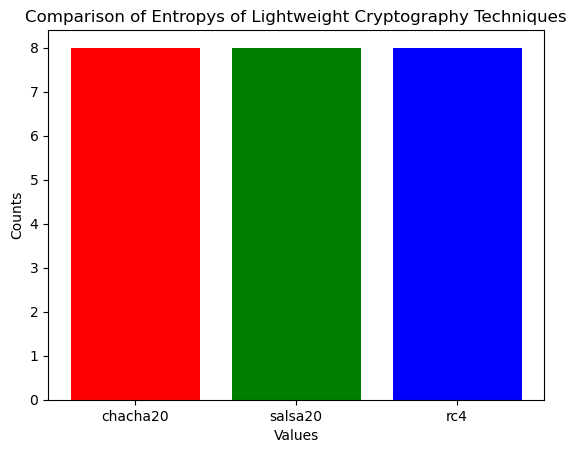

In [7]:
import matplotlib.pyplot as plt

# Define the values and labels
values = [chacha20_entropy, salsa20_entropy, rc4_entropy]  # Replace these values with your data
labels = ['chacha20', 'salsa20', 'rc4']

# Create a bar graph
plt.bar(labels, values, color=['red', 'green', 'blue'])

# Add labels and a title
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Comparison of Entropys of Lightweight Cryptography Techniques')

# Display the graph
plt.show()


# Comparison of Encryption Times

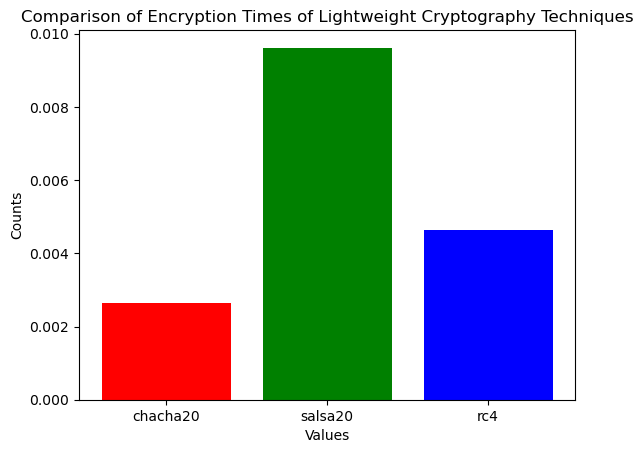

In [12]:
# Define the values and labels
values = [chacha20_time, salsa20_time, rc4_time]  # Replace these values with your data
labels = ['chacha20', 'salsa20', 'rc4']

# Create a bar graph
plt.bar(labels, values, color=['red', 'green', 'blue'])

# Add labels and a title
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Comparison of Encryption Times of Lightweight Cryptography Techniques')

# Display the graph
plt.show()

# Comparison of Decryption Times

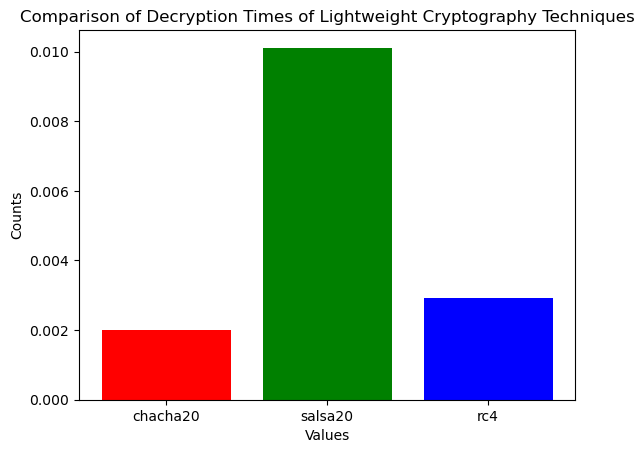

In [18]:
import matplotlib.pyplot as plt

# Define the values and labels
values = [chacha20_decryption_time, salsa20_decryption_time, rc4_decryption_time]  # Replace these values with your data
labels = ['chacha20', 'salsa20', 'rc4']

# Create a bar graph
plt.bar(labels, values, color=['red', 'green', 'blue'])

# Add labels and a title
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Comparison of Decryption Times of Lightweight Cryptography Techniques')

# Display the graph
plt.show()


# Non Lightweight Cryptography techniques

# 1. Hybrid encryption (RSA + AES)

In [ ]:
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import cv2
import numpy as np
import os

def generate_rsa_key_pair():
    # Generate RSA key pair (public and private keys)
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048,
        backend=default_backend()
    )
    public_key = private_key.public_key()
    return private_key, public_key

def encrypt_image_aes(image_path, key):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    image_bytes = image.tobytes()

    # Initialize the AES cipher
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    encryptor = cipher.encryptor()

    # Pad the data to match AES block size (16 bytes)
    pad_length = 16 - (len(image_bytes) % 16)
    padded_data = image_bytes + bytes([pad_length] * pad_length)

    # Encrypt the image
    encrypted_data = encryptor.update(padded_data) + encryptor.finalize()

    # Return the encrypted data and the original shape of the image
    return encrypted_data, image.shape

def decrypt_image_aes(encrypted_data, key, shape):
    # Initialize the AES cipher for decryption
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    decryptor = cipher.decryptor()

    # Decrypt the image
    decrypted_data = decryptor.update(encrypted_data) + decryptor.finalize()

    # Remove padding
    pad_length = decrypted_data[-1]
    decrypted_data = decrypted_data[:-pad_length]

    return np.frombuffer(decrypted_data, dtype=np.uint8).reshape(shape)

# Generate RSA key pair (public and private keys)
private_key, public_key = generate_rsa_key_pair()

# Encrypt and Save the AES Key using RSA
# Generate a 256-bit (32 byte) random key for AES
aes_key = os.urandom(32)
aes_key_encrypted = public_key.encrypt(
    aes_key,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None
    )
)

# Save encrypted AES key to a file
with open('encrypted_aes_key.bin', 'wb') as f:
    f.write(aes_key_encrypted)

# Read the encrypted AES key and Decrypt it using RSA
with open('encrypted_aes_key.bin', 'rb') as f:
    aes_key_encrypted = f.read()

aes_key_decrypted = private_key.decrypt(
    aes_key_encrypted,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None
    )
)

# Encrypt and Save the Image using AES
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
encrypted_data, shape = encrypt_image_aes(image_path, aes_key_decrypted)

# Save encrypted data to a file
with open('encrypted_image_aes.bin', 'wb') as f:
    f.write(encrypted_data)

# Read the encrypted data and Decrypt the Image using AES
with open('encrypted_image_aes.bin', 'rb') as f:
    encrypted_data = f.read()

decrypted_image = decrypt_image_aes(encrypted_data, aes_key_decrypted, shape)

# Convert to an image and display/save
cv2.imshow('AES Decrypted Image', decrypted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# It generates an RSA key pair, uses RSA to encrypt the symmetric key, and then uses AES to encrypt and decrypt the image data. It also displays the decrypted image. 

# Hybrid Encryption's encryption time

In [5]:
import time
import cv2
from Crypto.Cipher import PKCS1_OAEP, AES
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
import os

# Function to read image and convert to byte data
def get_image_data(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return image.tobytes()

# Function to test encryption algorithm
def test_encryption_algorithm(public_key, data):
    cipher_rsa = PKCS1_OAEP.new(public_key)
    
    # Generate a random symmetric key for AES
    symmetric_key = get_random_bytes(16)  # 128-bit key for AES
    cipher_aes = AES.new(symmetric_key, AES.MODE_EAX)
    
    start_time = time.time()
    
    # Encrypt the symmetric key with RSA
    encrypted_symmetric_key = cipher_rsa.encrypt(symmetric_key)
    
    # Encrypt the image data with AES
    nonce = cipher_aes.nonce
    ciphertext, tag = cipher_aes.encrypt_and_digest(data)
    
    end_time = time.time()
    
    return end_time - start_time

# Load image data
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
image_data = get_image_data(image_path)

# Generate an RSA key pair
key = RSA.generate(2048)  # You can adjust the key size as needed
public_key = key.publickey()

# Testing RSA encryption with hybrid encryption using AES
hybrid_time = test_encryption_algorithm(public_key, image_data)

# Repeat for other algorithms like Salsa20, AES, etc., and compare the times
# ...

print(f"Hybrid RSA encryption time: {hybrid_time}")
# Print times for other algorithms


Hybrid RSA encryption time: 0.01523280143737793


# Hybrid Encryption's decryption time

In [6]:
import time
import cv2
from Crypto.Cipher import PKCS1_OAEP, AES
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
import os

# Function to read image and convert to byte data
def get_image_data(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return image.tobytes()

# Function to test decryption algorithm
def test_decryption_algorithm(private_key, encrypted_data):
    cipher_rsa = PKCS1_OAEP.new(private_key)
    
    start_time = time.time()
    
    # Decrypt the symmetric key with RSA
    symmetric_key = cipher_rsa.decrypt(encrypted_data[:private_key.size_in_bytes()])  # Adjust for key size
    
    # Decrypt the image data with AES
    cipher_aes = AES.new(symmetric_key, AES.MODE_EAX, nonce=encrypted_data[private_key.size_in_bytes():private_key.size_in_bytes() + 16])
    decrypted_data = cipher_aes.decrypt_and_verify(
        encrypted_data[private_key.size_in_bytes() + 16:-16],  # Adjust for tag size
        encrypted_data[-16:]
    )
    
    end_time = time.time()
    
    return end_time - start_time

# Load image data
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
image_data = get_image_data(image_path)

# Generate an RSA key pair
key = RSA.generate(2048)  # You can adjust the key size as needed
public_key = key.publickey()
private_key = key

# Testing RSA encryption with hybrid encryption using AES
cipher_rsa = PKCS1_OAEP.new(public_key)

# Encrypt the symmetric key with RSA
symmetric_key = get_random_bytes(16)  # 128-bit key for AES
cipher_aes = AES.new(symmetric_key, AES.MODE_EAX)

# Encrypt the symmetric key with RSA
encrypted_symmetric_key = cipher_rsa.encrypt(symmetric_key)

# Encrypt the image data with AES
nonce = cipher_aes.nonce
ciphertext, tag = cipher_aes.encrypt_and_digest(image_data)

# Concatenate the encrypted symmetric key, nonce, ciphertext, and tag
encrypted_data = encrypted_symmetric_key + nonce + ciphertext + tag

# Testing RSA decryption
hybrid_decrypt_time = test_decryption_algorithm(private_key, encrypted_data)

# Repeat for other algorithms like Salsa20, AES, etc., and compare the times
# ...

print(f"Hybrid RSA decryption time: {hybrid_decrypt_time}")
# Print times for other algorithms


Hybrid RSA decryption time: 0.015989065170288086


# 2. 3DES

In [ ]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding
import cv2
import numpy as np
import os

def encrypt_image_3des(image_path, key):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    image_bytes = image.tobytes()

    # Initialize the 3DES cipher
    cipher = Cipher(algorithms.TripleDES(key), modes.ECB(), backend=default_backend())
    encryptor = cipher.encryptor()
    
    # Pad the data to match 3DES block size (8 bytes)
    padder = padding.PKCS7(64).padder()
    padded_data = padder.update(image_bytes) + padder.finalize()

    # Encrypt the image
    encrypted_data = encryptor.update(padded_data) + encryptor.finalize()

    # Return the encrypted data and the original shape of the image
    return encrypted_data, image.shape

def decrypt_image_3des(encrypted_data, key, shape):
    # Initialize the 3DES cipher for decryption
    cipher = Cipher(algorithms.TripleDES(key), modes.ECB(), backend=default_backend())
    decryptor = cipher.decryptor()

    # Decrypt the image
    decrypted_data = decryptor.update(encrypted_data) + decryptor.finalize()

    # Unpad the data
    unpadder = padding.PKCS7(64).unpadder()
    unpadded_data = unpadder.update(decrypted_data) + unpadder.finalize()

    return np.frombuffer(unpadded_data, dtype=np.uint8).reshape(shape)

# Generate a 192-bit (24 byte) random key for 3DES
key = os.urandom(24)

# Encrypt and Save the Image
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
encrypted_data, shape = encrypt_image_3des(image_path, key)

# Save encrypted data to a file
with open('encrypted_image_3des.bin', 'wb') as f:
    f.write(encrypted_data)

# Read the encrypted data and Decrypt the Image
with open('encrypted_image_3des.bin', 'rb') as f:
    encrypted_data = f.read()

decrypted_image = decrypt_image_3des(encrypted_data, key, shape)

# Convert to an image and display/save
cv2.imshow('3DES Decrypted Image', decrypted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 3DES encryption time

In [7]:
import time
import cv2
from Crypto.Cipher import PKCS1_OAEP, DES3
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
import os

# Function to read image and convert to byte data
def get_image_data(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return image.tobytes()

# Function to test encryption algorithm
def test_encryption_algorithm(public_key, data):
    cipher_rsa = PKCS1_OAEP.new(public_key)
    
    # Generate a random symmetric key for 3DES
    symmetric_key = get_random_bytes(24)  # 192-bit key for 3DES
    cipher_des3 = DES3.new(symmetric_key, DES3.MODE_EAX)
    
    start_time = time.time()
    
    # Encrypt the symmetric key with RSA
    encrypted_symmetric_key = cipher_rsa.encrypt(symmetric_key)
    
    # Encrypt the image data with 3DES
    nonce = cipher_des3.nonce
    ciphertext, tag = cipher_des3.encrypt_and_digest(data)
    
    end_time = time.time()
    
    return end_time - start_time

# Load image data
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
image_data = get_image_data(image_path)

# Generate an RSA key pair
key = RSA.generate(2048)  # You can adjust the key size as needed
public_key = key.publickey()

# Testing RSA encryption with hybrid encryption using 3DES
des3_time = test_encryption_algorithm(public_key, image_data)

# Repeat for other algorithms like Salsa20, AES, etc., and compare the times
# ...

print(f"3DES encryption time: {des3_time}")
# Print times for other algorithms


3DES encryption time: 0.15771985054016113


# 3DES decryption time

In [8]:
import time
import cv2
from Crypto.Cipher import PKCS1_OAEP, DES3
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
import os

# Function to read image and convert to byte data
def get_image_data(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return image.tobytes()

# Function to test decryption algorithm
def test_decryption_algorithm(private_key, encrypted_data):
    cipher_rsa = PKCS1_OAEP.new(private_key)
    
    # Decrypt the symmetric key with RSA
    decrypted_symmetric_key = cipher_rsa.decrypt(encrypted_data['symmetric_key'])
    
    # Decrypt the image data with 3DES
    cipher_des3 = DES3.new(decrypted_symmetric_key, DES3.MODE_EAX, nonce=encrypted_data['nonce'])
    
    start_time = time.time()
    
    decrypted_data = cipher_des3.decrypt_and_verify(encrypted_data['ciphertext'], encrypted_data['tag'])
    
    end_time = time.time()
    
    return end_time - start_time

# Load image data
image_path = '/Users/rohithmekala/Desktop/lung.png'  # Replace with your image path
image_data = get_image_data(image_path)

# Generate an RSA key pair
key = RSA.generate(2048)  # You can adjust the key size as needed
public_key = key.publickey()
private_key = key

# Encrypt the image data using 3DES
symmetric_key = get_random_bytes(24)  # 192-bit key for 3DES
cipher_des3 = DES3.new(symmetric_key, DES3.MODE_EAX)
nonce = cipher_des3.nonce
ciphertext, tag = cipher_des3.encrypt_and_digest(image_data)

# Encrypt the symmetric key using RSA
cipher_rsa = PKCS1_OAEP.new(public_key)
encrypted_symmetric_key = cipher_rsa.encrypt(symmetric_key)

# Store the encrypted data and parameters
encrypted_data = {
    'symmetric_key': encrypted_symmetric_key,
    'nonce': nonce,
    'ciphertext': ciphertext,
    'tag': tag
}

# Testing RSA decryption with hybrid decryption using 3DES
des3_decrypt_time = test_decryption_algorithm(private_key, encrypted_data)

print(f"3DES decryption time: {des3_decrypt_time}")


3DES decryption time: 0.15653014183044434


# Analysis of Non Lightweight Cryptography Techniques

# Comparison of Encryption Times

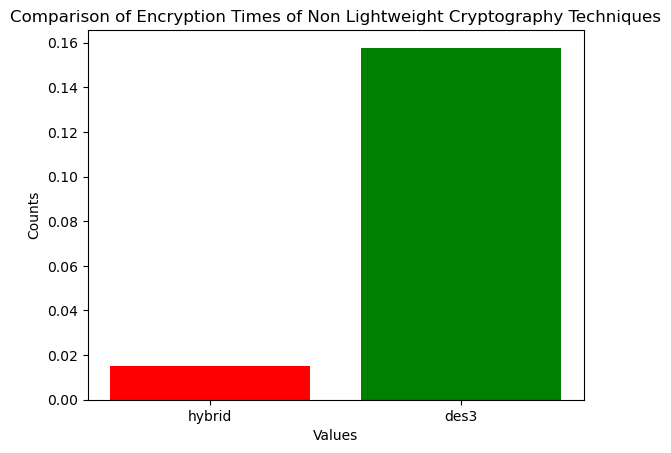

In [9]:
import matplotlib.pyplot as plt

# Define the values and labels
values = [hybrid_time, des3_time]  # Replace these values with your data
labels = ['hybrid', 'des3']

# Create a bar graph
plt.bar(labels, values, color=['red', 'green'])

# Add labels and a title
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Comparison of Encryption Times of Non Lightweight Cryptography Techniques')

# Display the graph
plt.show()

# Comparison of Decryption Times

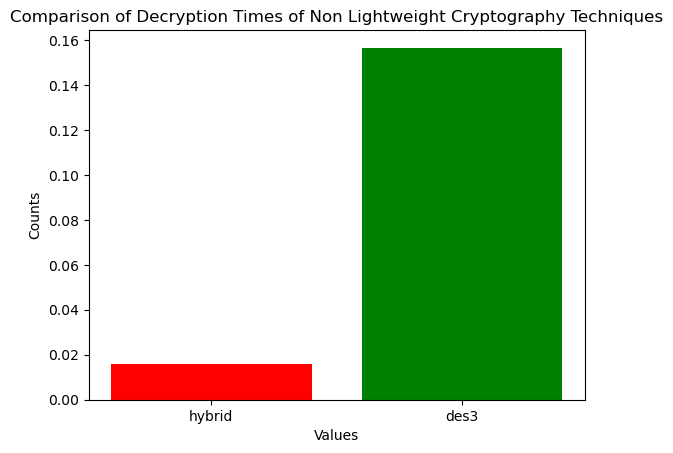

In [10]:
import matplotlib.pyplot as plt

# Define the values and labels
values = [hybrid_decrypt_time, des3_decrypt_time]  # Replace these values with your data
labels = ['hybrid', 'des3']

# Create a bar graph
plt.bar(labels, values, color=['red', 'green'])

# Add labels and a title
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Comparison of Decryption Times of Non Lightweight Cryptography Techniques')

# Display the graph
plt.show()

# Final Analysis

# Comparison of Decryption Times of Lightweight vs Non Lightweight Cryptography Techniques

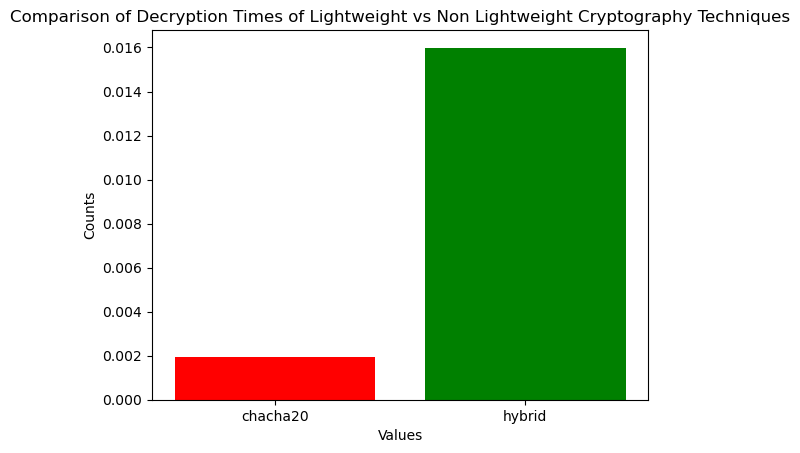

In [15]:
import matplotlib.pyplot as plt

# Define the values and labels
values = [chacha20_decryption_time, hybrid_decrypt_time]  # Replace these values with your data
labels = ['chacha20', 'hybrid']

# Create a bar graph
plt.bar(labels, values, color=['red', 'green'])

# Add labels and a title
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Comparison of Decryption Times of Lightweight vs Non Lightweight Cryptography Techniques')

# Display the graph
plt.show()
